# Mapas isopacos con Python

En este tutorial realizaremos un mapa isopaco utilizando las funciones de Python para interpolar entre puntos espaciados irregularmente (coordenadas $x$ e $y$) para luego graficar los espesores ($z$). Los pasos se describen como comentarios en el script.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import pandas as pd

# Primero cargamos los datos desde un archivo guardado como cvs (comma separated values).

data=pd.read_csv('/home/fergomez/Dropbox/Estrati/Datos_mapa_isospaco-xyz.csv', header=None)

In [43]:
#Extraemos los datos del conjunto de datos

x=data[0]
y=data[1]
z=data[2]

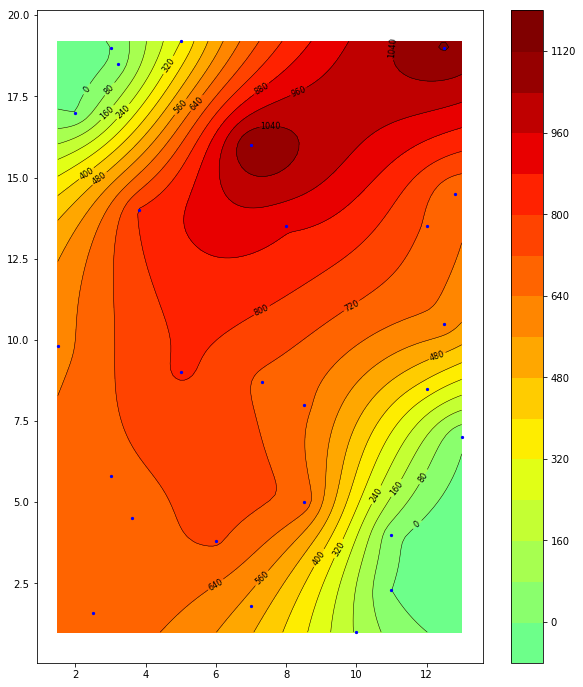

In [59]:
# Generamos una grilla regular de puntos para interpolar
xi, yi = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Realizamos la interpolacion (lineal) mediante scipy.interpolate
rbf = scipy.interpolate.Rbf(x, y, z, function='linear')
zi = rbf(xi, yi)

# Ploteamos los datos (lineas isopacas)
CS = plt.contour(xi, yi, zi, 15, linewidths=0.5, colors='k')
plt.clabel(CS, inline=True, fontsize=8, fmt = '%1.0f')
CS = plt.contourf(xi, yi, zi, 15, cmap=plt.cm.jet,
                 vmax=abs(zi).max(), vmin=-abs(zi).max())
plt.colorbar()  # Esto plotea la barra de colores de escala

plt.scatter(x, y, marker='o', c='b', s=5, zorder=10) #plotea ubicacion de puntos x e y
plt.rcParams["figure.figsize"]=[10.0,12]

#Eliminar el numeral en la linea siguiente en caso de queres guardar el plot como pdf
#plt.savefig('Mapa_isopaco_Python', format='pdf', dpi=300)

plt.show() #para mostrar el grafico